In [1]:
from tokenize import group
from sklearn.semi_supervised import LabelSpreading
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import plotly.express as px

data = pd.read_csv(r'C:\Users\USUARIO\Documents\GitHub\Oil-Gas-Projects\API Oil Production\Datasets\Oil_prod_curve.csv')

In [90]:
well = data.groupby('API').count()
well 

,Date,Oil,Formation_ID,Basin_ID,Lateral_Length,Month_Ord,Basin_name,Formation_name
API,,,,,,,,
0,53,53,53,53,53,53,53,53
1,54,54,54,54,54,54,54,54
2,54,54,54,54,54,54,54,54
3,50,50,50,50,50,50,50,50
5,55,55,55,55,55,55,55,55
...,...,...,...,...,...,...,...,...
7839,37,37,37,37,37,37,37,37
7840,37,37,37,37,37,37,37,37
7841,37,37,37,37,37,37,37,37


In [99]:
wells = well.index[well.Oil > 60]

In [100]:
data[data.API.isin(wells)]

,Date,API,Oil,Formation_ID,Basin_ID,Lateral_Length,Month_Ord,Basin_name,Formation_name
2724,2014-01-01,1436,20903.0,65,3,9491,0,WILLISTON BASIN,THREE FORKS
2725,2014-02-01,1436,13110.0,65,3,9491,1,WILLISTON BASIN,THREE FORKS
2726,2014-03-01,1436,10593.0,65,3,9491,2,WILLISTON BASIN,THREE FORKS
2727,2014-04-01,1436,8082.0,65,3,9491,3,WILLISTON BASIN,THREE FORKS
2728,2014-05-01,1436,7498.0,65,3,9491,4,WILLISTON BASIN,THREE FORKS
...,...,...,...,...,...,...,...,...,...
334476,2018-08-01,4494,0.0,3,2,3656,61,PERMIAN BASIN,BONE SPRING
334477,2018-09-01,4494,0.0,3,2,3656,62,PERMIAN BASIN,BONE SPRING
334478,2018-10-01,4494,6.0,3,2,3656,63,PERMIAN BASIN,BONE SPRING
334479,2018-11-01,4494,0.0,3,2,3656,64,PERMIAN BASIN,BONE SPRING


In [63]:
API = 15
Formation_ID = 1
Basin_ID = 1
Lateral_Length = 9442

start_month = 10
end_month = 36

In [3]:
df = pd.DataFrame()
for x in range(start_month,end_month):
    df_n = pd.DataFrame({'Well':API, 'Formation':Formation_ID, 'Basin':Basin_ID, 'Lateral Length':Lateral_Length, 'Month_Ord':x}, index = [x])
    df = pd.concat([df,df_n], axis=0)

In [4]:
model = pickle.load(open(r'C:\Users\USUARIO\Documents\GitHub\Oil-Gas-Projects\API Oil Production\Notebooks\Oil_pred.pkl','rb'))

In [5]:
preds = model.predict(df)

In [6]:
np.round(preds, 1)

array([1709.6, 1709.6, 1744.9, 1744.9, 1744.9, 1744.9, 1744.9, 1744.9,
       1744.9, 1744.9, 1744.9, 1744.9, 1744.9, 1744.9, 1744.9, 1744.9,
       1744.9, 1744.9, 1744.9, 1744.9, 1744.9, 1744.9, 1744.9, 1843.6,
       1985.3, 1985.3, 1985.3, 1985.3, 1985.3, 1985.3, 1985.3, 1985.3,
       1985.3, 1985.3, 1985.3, 1985.3, 1985.3, 1953.1, 1920.1, 1920.1,
       1920.1], dtype=float32)

In [50]:
index = np.arange(start_month, end_month).tolist()

In [64]:
data_df = pd.DataFrame(zip(preds, data.Oil[data.API == API][start_month:end_month] ),columns=('Predictions', 'Oil_Production'), index=index)

In [65]:
data_df

,Predictions,Oil_Production
10,1709.619141,1360.0
11,1709.619141,1235.0
12,1744.935547,1267.0
13,1744.935547,469.0
14,1744.935547,360.0
15,1744.935547,831.0
16,1744.935547,757.0
17,1744.935547,647.0
18,1744.935547,737.0
19,1744.935547,785.0


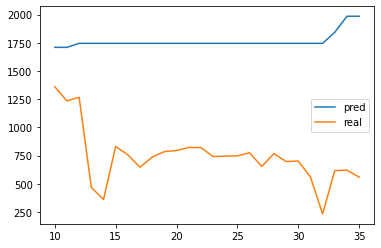

In [66]:
fig, ax = plt.subplots()
ax.plot(data_df)
ax.legend(['pred','real'])

In [53]:
data_df.index

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
            27, 28, 29, 30, 31, 32, 33, 34, 35],
           dtype='int64')